In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text


In [2]:
df1=pd.read_csv("IMDB dataset.csv")
df2=pd.read_csv("IMDB dataset.csv")

In [3]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df1.groupby("sentiment").describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  This show comes up with interesting locations ...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [5]:
# taking negative sentiment and deleting positive
df1 = df1[~df1.sentiment.str.contains("positive")]

In [6]:
df1.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


In [7]:
# randomly picking 1250 rows
df1 = df1.sample(n=1250, replace=True)

In [8]:
df1["sentiment"].value_counts()

negative    1250
Name: sentiment, dtype: int64

In [9]:
#taking positive senitment and deleting negative
df2 = df2[~df2.sentiment.str.contains("negative")]

In [10]:
df2.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [11]:
# randomly picking 1250 rows
df2 = df2.sample(n=1250, replace=True)

In [12]:
df2["sentiment"].value_counts()

positive    1250
Name: sentiment, dtype: int64

In [13]:
#concating positive and negative sentiment
frames = [df1, df2]

df = pd.concat(frames)


In [14]:
df.head()

,review,sentiment
16518,This film is much the same as Cannibal Holocau...,negative
36627,"This film, by Oscar Petersson, is unique. Its ...",negative
16018,I'm in Iraq right now doing a job that gives p...,negative
22569,There's considerable amount of money behind th...,negative
25232,Chan Wook Park is nothing if not inventive. I'...,negative


In [15]:
df["sentiment"].value_counts()

negative    1250
positive    1250
Name: sentiment, dtype: int64

In [16]:
class_names = ['positive', 'negative']

In [17]:
# replacing positive sentiment with 1 and negative with 0
encoding = {
    
    'positive': 1,
    'negative': 0
}

In [18]:
reviews = df['review'].values.tolist()
sentiments = df['sentiment'].tolist()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=.2)

In [20]:
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [21]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [22]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [25]:
learner1 = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [26]:
"""early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                 patience=5, 
                                                 restore_best_weights=True)"""

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [27]:
learner1.fit(2e-5,10,callbacks=[callback] )

Epoch 1/10
334/334 [==============================] - 5852s 18s/step - loss: 0.3578 - accuracy: 0.8350 - val_loss: 0.2301 - val_accuracy: 0.9220
Epoch 2/10
334/334 [==============================] - 5842s 17s/step - loss: 0.1395 - accuracy: 0.9495 - val_loss: 0.2589 - val_accuracy: 0.9200
Epoch 3/10
334/334 [==============================] - 5655s 17s/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.3338 - val_accuracy: 0.9120
Epoch 4/10
334/334 [==============================] - 5873s 18s/step - loss: 0.0303 - accuracy: 0.9915 - val_loss: 0.4691 - val_accuracy: 0.9020
Epoch 5/10
334/334 [==============================] - 5282s 16s/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.9379 - val_accuracy: 0.8420
Epoch 6/10
334/334 [==============================] - 2999s 9s/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.5393 - val_accuracy: 0.8620
Epoch 7/10
334/334 [==============================] - 2075s 6s/step - loss: 0.0157 - accuracy: 0.9955 - val_loss: 0.5892 - val_accu

In [28]:
learner1.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.91      0.85      0.88       258
    negative       0.85      0.91      0.88       242

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



array([[219,  39],
       [ 22, 220]], dtype=int64)

simulating training for different learning rates... this may take a few moments...
Epoch 1/6
667/667 [==============================] - 3692s 6s/step - loss: 0.7084 - accuracy: 0.5495
Epoch 2/6
667/667 [==============================] - 3762s 6s/step - loss: 0.3560 - accuracy: 0.8543
Epoch 3/6
667/667 [==============================] - 3715s 6s/step - loss: 0.6229 - accuracy: 0.6438
Epoch 4/6
667/667 [==============================] - 3711s 6s/step - loss: 1.2551 - accuracy: 0.5117


done.
Visually inspect loss plot and select learning rate associated with falling loss


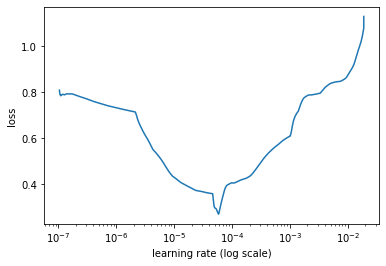

In [24]:
# Using lr_find to find a good learning rate
learner.lr_find(show_plot=True, max_epochs=6)

In [23]:
learner2 = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [24]:
learner2.fit(2e-5,4)

Epoch 1/4
334/334 [==============================] - 2110s 6s/step - loss: 0.3676 - accuracy: 0.8300 - val_loss: 0.3005 - val_accuracy: 0.8680
Epoch 2/4
334/334 [==============================] - 2100s 6s/step - loss: 0.1428 - accuracy: 0.9535 - val_loss: 0.3122 - val_accuracy: 0.8880
Epoch 3/4
334/334 [==============================] - 2098s 6s/step - loss: 0.0463 - accuracy: 0.9835 - val_loss: 0.4246 - val_accuracy: 0.8960
Epoch 4/4
334/334 [==============================] - 2099s 6s/step - loss: 0.0324 - accuracy: 0.9875 - val_loss: 0.3877 - val_accuracy: 0.8860


In [25]:
learner2.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

    positive       0.90      0.88      0.89       260
    negative       0.87      0.89      0.88       240

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



array([[229,  31],
       [ 26, 214]], dtype=int64)

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [42]:
import time 

message = 'I dont feel so good as today is my exam'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: negative (0.32)


In [40]:
predictor.save("models/bert_model")